In [0]:
!unzip -q '/content/drive/My Drive/images.zip' -d '/content'

In [0]:
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)

import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from sklearn.metrics import classification_report

batch_size = 64
epochs = 50
IMG_HEIGHT, IMG_WIDTH, channels = 220, 220, 3

dir = '/content/'
train_dir = os.path.join(dir, 'images')

train_gen = ImageDataGenerator(rescale=1.0/255.,
                               validation_split=0.2) # ustawienie podziału na 80 i 20 proc
                               # zmienić coś z tym validation bo TO NA PEWNO nie dzieli randomowo

# do podzielenia danych można użyć i tego
# https://pypi.org/project/split-folders/

train_generator = train_gen.flow_from_directory(
    train_dir,
    batch_size=batch_size,
    shuffle=True,
    color_mode="rgb",
    class_mode='categorical',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    subset='training')

validation_generator = train_gen.flow_from_directory(
    train_dir,
    batch_size=batch_size,
    shuffle=False,
    color_mode="rgb",
    class_mode='categorical',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    subset='validation')

Using TensorFlow backend.


Found 85599 images belonging to 6 classes.
Found 21396 images belonging to 6 classes.


In [3]:
model = Sequential()

# add model layers
model.add(Conv2D(32, kernel_size=3, activation="relu", 
                 input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), data_format="channels_last"))
model.add(Conv2D(32, kernel_size=5, activation="relu"))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
# model.add(Dropout(0.3)) # użycie gdy jest przeuczony, dużo więcej acc niż val_acc
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(8, kernel_size=3, activation="relu"))
model.add(Conv2D(8, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(8, kernel_size=3, activation="relu"))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
# warstwa łącząca conv2d z warstwą dense
model.add(Flatten())
# liczba taka ile wyjść, czyli 6 bo tyle jest typów
model.add(Dense(6, activation="softmax"))

# compile model using accuracy to measure model performance
model.compile(optimizer=keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07), 
              loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit_generator(train_generator, 
                              validation_data = validation_generator,
                              steps_per_epoch=train_generator.samples // batch_size,
                              use_multiprocessing=True, workers=4, epochs=epochs, shuffle=True, verbose=2)

Epoch 1/50
1337/1337 [==============================] - 302s 226ms/step - loss: 0.6803 - accuracy: 0.7805 - val_loss: 1.5619 - val_accuracy: 0.8651
Epoch 2/50
Epoch 1/50
1337/1337 [==============================] - 288s 216ms/step - loss: 0.3927 - accuracy: 0.8841 - val_loss: 1.0490 - val_accuracy: 0.8728
Epoch 3/50
1337/1337 [==============================] - 288s 216ms/step - loss: 0.3310 - accuracy: 0.9046 - val_loss: 1.1268 - val_accuracy: 0.8833
Epoch 4/50
1337/1337 [==============================] - 287s 215ms/step - loss: 0.2844 - accuracy: 0.9194 - val_loss: 1.0286 - val_accuracy: 0.9211
Epoch 5/50
1337/1337 [==============================] - 289s 216ms/step - loss: 0.2606 - accuracy: 0.9266 - val_loss: 1.3318 - val_accuracy: 0.9345
Epoch 6/50
1337/1337 [==============================] - 287s 215ms/step - loss: 0.2425 - accuracy: 0.9303 - val_loss: 1.4244 - val_accuracy: 0.9279
Epoch 7/50
1337/1337 [==============================] - 288s 216ms/step - loss: 0.2260 - accuracy: 0.

In [4]:
validation_generator.reset()
probabilities = model.predict_generator(validation_generator, verbose=1)

y_test = probabilities.argmax(axis=1)
y_pred = validation_generator.classes
print(classification_report(y_test, y_pred))

scores = model.evaluate_generator(validation_generator, verbose=1)
print(model.metrics_names[0] + " = ", scores[0])
print(model.metrics_names[1] + " = ", scores[1])

335/335 [==============================] - 41s 122ms/step
              precision    recall  f1-score   support

           0       0.50      0.45      0.47       563
           1       0.99      0.90      0.94      1779
           2       0.95      0.98      0.96     14638
           3       0.97      0.97      0.97      1413
           4       0.97      0.94      0.96      1508
           5       0.85      0.81      0.83      1495

    accuracy                           0.94     21396
   macro avg       0.87      0.84      0.86     21396
weighted avg       0.94      0.94      0.94     21396

335/335 [==============================] - 41s 122ms/step
loss =  0.10620017349720001
accuracy =  0.9401757121086121


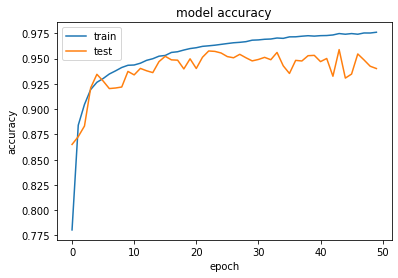

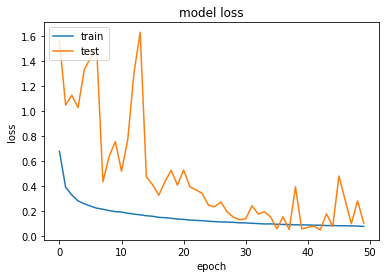

In [5]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# Zapisanie modelu do pliku
model.save('model.h5')